In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
Init_vac_csv = pd.read_csv('owid-covid-data.csv')


In [2]:
#data = stateloop()
#print(data)

In [3]:
init_vac_df = pd.DataFrame(Init_vac_csv)

In [4]:
init_vac_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330827,ZWE,Africa,Zimbabwe,2023-07-29,265693.0,NaN,NaN,5712.0,1.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
330828,ZWE,Africa,Zimbabwe,2023-07-30,265693.0,0.0,0.0,5712.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
330829,ZWE,Africa,Zimbabwe,2023-07-31,265693.0,0.0,0.0,5712.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
330830,ZWE,Africa,Zimbabwe,2023-08-01,265693.0,0.0,0.0,5712.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [5]:
init_vac_df["continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [6]:
init_vac_df["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [7]:
init_vac_df.loc[init_vac_df["location"]=="United States"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
311307,USA,North America,United States,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
311308,USA,North America,United States,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
311309,USA,North America,United States,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,-2640.0,-4.2,-4.2,-7.858499
311310,USA,North America,United States,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
311311,USA,North America,United States,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312610,USA,North America,United States,2023-07-29,103436829.0,0.0,0.0,1127152.0,0.0,0.0,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
312611,USA,North America,United States,2023-07-30,103436829.0,0.0,0.0,1127152.0,0.0,0.0,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
312612,USA,North America,United States,2023-07-31,103436829.0,0.0,0.0,1127152.0,0.0,0.0,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
312613,USA,North America,United States,2023-08-01,103436829.0,0.0,0.0,1127152.0,0.0,0.0,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


In [8]:
usa_vac = init_vac_df.loc[init_vac_df["location"]=="United States"]

In [9]:
birth_vac = usa_vac[["reproduction_rate","people_fully_vaccinated"]]

In [10]:
birth_vac.dropna()

,reproduction_rate,people_fully_vaccinated
311652,1.07,9669.0
311653,1.06,9833.0
311654,1.05,10161.0
311655,1.04,10679.0
311656,1.03,11505.0
...,...,...
312398,0.93,229553298.0
312399,0.93,229575525.0
312400,0.92,229580638.0
312401,0.90,229581410.0


In [11]:
birth_vac

,reproduction_rate,people_fully_vaccinated
311307,NaN,NaN
311308,NaN,NaN
311309,NaN,NaN
311310,NaN,NaN
311311,NaN,NaN
...,...,...
312610,NaN,NaN
312611,NaN,NaN
312612,NaN,NaN
312613,NaN,NaN


In [12]:
vaccines = pd.read_csv('usa_covid_vaccine.csv')

In [13]:
vaccines3 = vaccines[["Pfizer-BioNTech original","Pfizer-BioNTech updated booster","Moderna original","Moderna updated booster","J&J/Janssen"]]

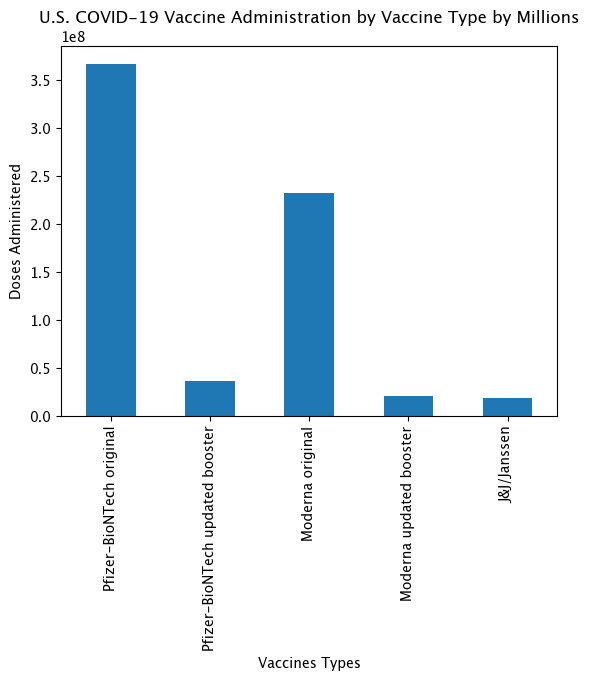

In [14]:
vaccines3.transpose().plot.bar(xlabel = "Vaccines Types", ylabel = "Doses Administered", 
                               title= "U.S. COVID-19 Vaccine Administration by Vaccine Type by Millions",
                              legend = False);


In [15]:
Fertility_rates = pd.read_csv('fertility_rates.csv')

In [16]:
Fertility_rates["Country"].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [17]:
fertusa_rates= Fertility_rates[Fertility_rates["Country"]=="United States"]

In [33]:
fertusa_rates

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
251,United States,USA,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.654,3.62,3.461,3.319,3.19,2.913,...,1.8805,1.8575,1.8625,1.8435,1.8205,1.7655,1.7295,1.706,1.6415,1.664


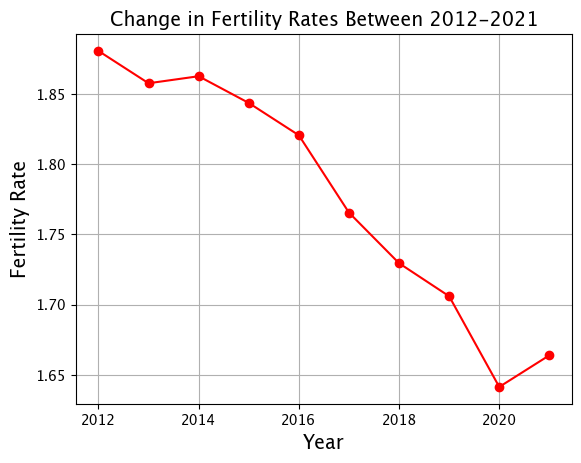

In [47]:
   
data = {'year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
        'fert_rate': [1.8805, 1.8575, 1.8625,1.8435,1.8205,1.7655,1.7295,1.706,1.6415,1.664]
       }
  
df = pd.DataFrame(data)
  
plt.plot(df['year'], df['fert_rate'], color='red', marker='o')
plt.title('Change in Fertility Rates Between 2012-2021', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Fertility Rate', fontsize=14)
plt.grid(True)
plt.show()

In [48]:
covidpreg = pd.read_csv('COVID_preg.csv')

In [62]:
covidpreg.rename(columns={'Unnamed: 1': 'Yes Covid (Total)', 'Unnamed: 2': 'No Covid (Total)','Unnamed: 3': 'Yes Covid (Non Hispanic White)', 'Unnamed: 4': 'No Covid (Non Hispanic White)','Unnamed: 5': 'Yes Covid (Non-Hispanic Black)', 'Unnamed: 6': 'No Covid(Non-Hispanic Black)','Unnamed: 7': 'Yes Covid (Hispanic)', 'Unnamed: 8': 'No Covid (Hispanic)'}, inplace=True)

In [69]:
covidpreg.dropna().style

,"Table 1. Presumed or confirmed cases of maternal COVID-19 during pregnancy, by selected maternal and infant characteristics and by race and Hispanic origin of the mother: 14 states and the District of Columbia, April 2020-December 2022",Yes Covid,No Covid,Yes Covid,No Covid,Yes Covid,No Covid,Yes Covid,No Covid
5,Total,"142,561","2,440,305","71,306","1,168,631","20,484","278,321","34,328","655,033"
7,COVID-19 case percent distribution5,100.0,…,50.0,…,14.4,…,24.1,…
8,Non-COVID-19 case percent distribution5,…,100.0,…,47.9,…,11.4,…,26.8
12,Total5,99.9,100.1,100.0,100.0,99.9,100.0,100.1,100.0
13,Under 20,4.5,4.1,3.5,3.1,6.4,6.3,5.8,5.5
14,20-24,19.9,17.7,18.9,16.5,24.4,22.7,21.5,21.0
15,25-29,29.5,27.4,30.6,28.1,29.6,28.3,29.5,29.0
16,30-34,28.4,30.0,30.1,32.0,24.9,25.2,25.5,26.0
17,35-39,14.4,16.8,14.2,16.8,11.7,13.7,14.1,14.5
18,40 or more,3.2,4.1,2.7,3.5,2.9,3.8,3.7,4.0
